<a href="https://colab.research.google.com/github/230701177/Fundamentals_Of_Machine_Learning/blob/main/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
df_diabetes = pd.read_csv('diabetes.csv')
print("Dataset loaded successfully. Displaying the first 5 rows:")
df_diabetes.head()

Dataset loaded successfully. Displaying the first 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print('Statistical Summary of the Dataset:')
df_diabetes.describe()

Statistical Summary of the Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
print(df_diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


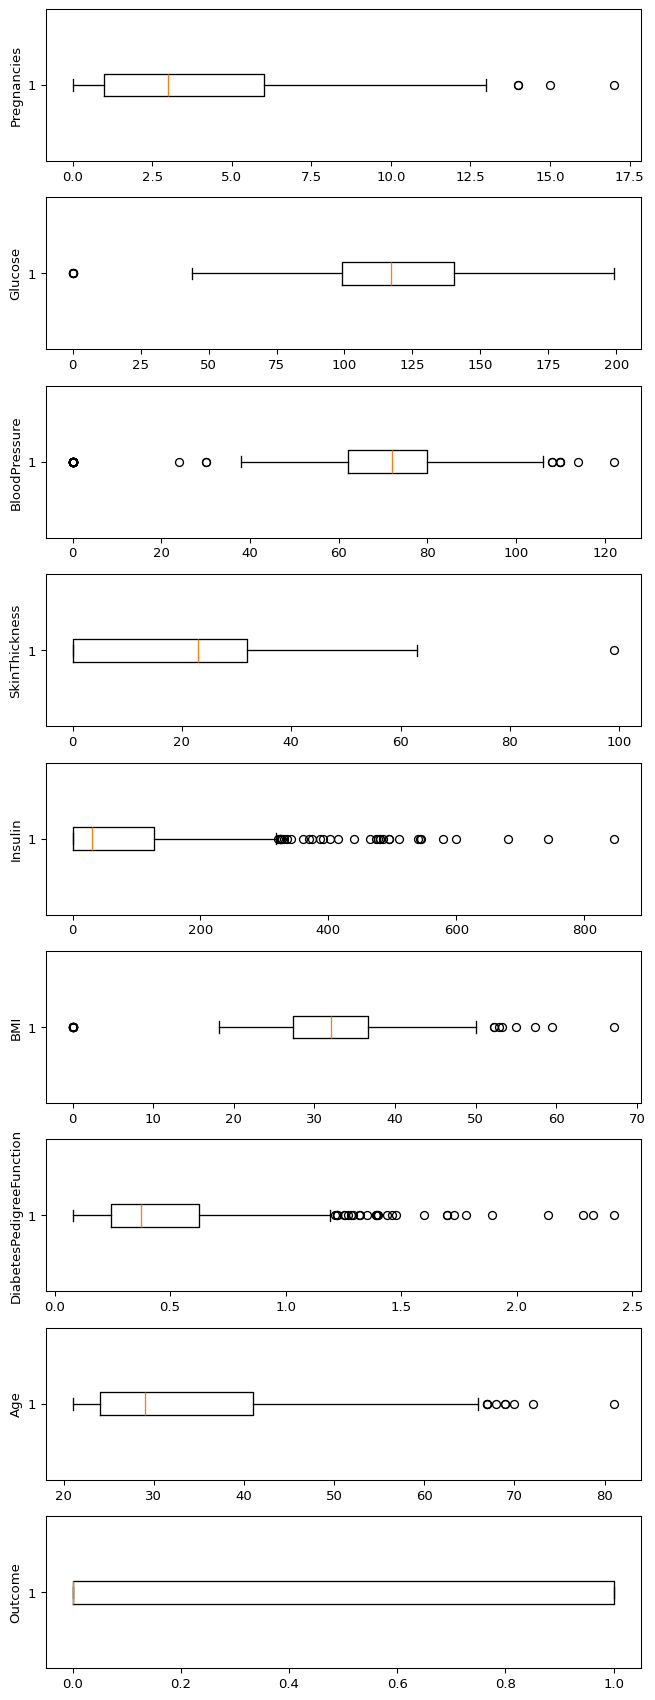

In [6]:
fig, axs = plt.subplots(len(df_diabetes.columns), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(df_diabetes.columns):
    axs[i].boxplot(df_diabetes[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [7]:
df_cleaned = df_diabetes.copy()

# Columns identified for outlier removal, excluding 'Outcome' as it's a target variable
columns_to_clean = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age'
]

# Initialize a boolean mask to track outliers. Initially, no rows are marked as outliers.
outlier_mask = pd.Series([False] * len(df_cleaned), index=df_cleaned.index)

for col in columns_to_clean:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update the outlier_mask: if a value in the current column is outside the bounds,
    # mark the corresponding row as True. The '|' (OR) operation ensures that if a row
    # is an outlier in ANY of the processed columns, it remains marked as an outlier.
    outlier_mask = outlier_mask | (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)

# Filter the DataFrame to keep only rows that are NOT marked as outliers
df_cleaned = df_cleaned[~outlier_mask]

print(f"Original DataFrame shape: {df_diabetes.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

display(df_cleaned.head())

Original DataFrame shape: (768, 9)
Cleaned DataFrame shape: (639, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


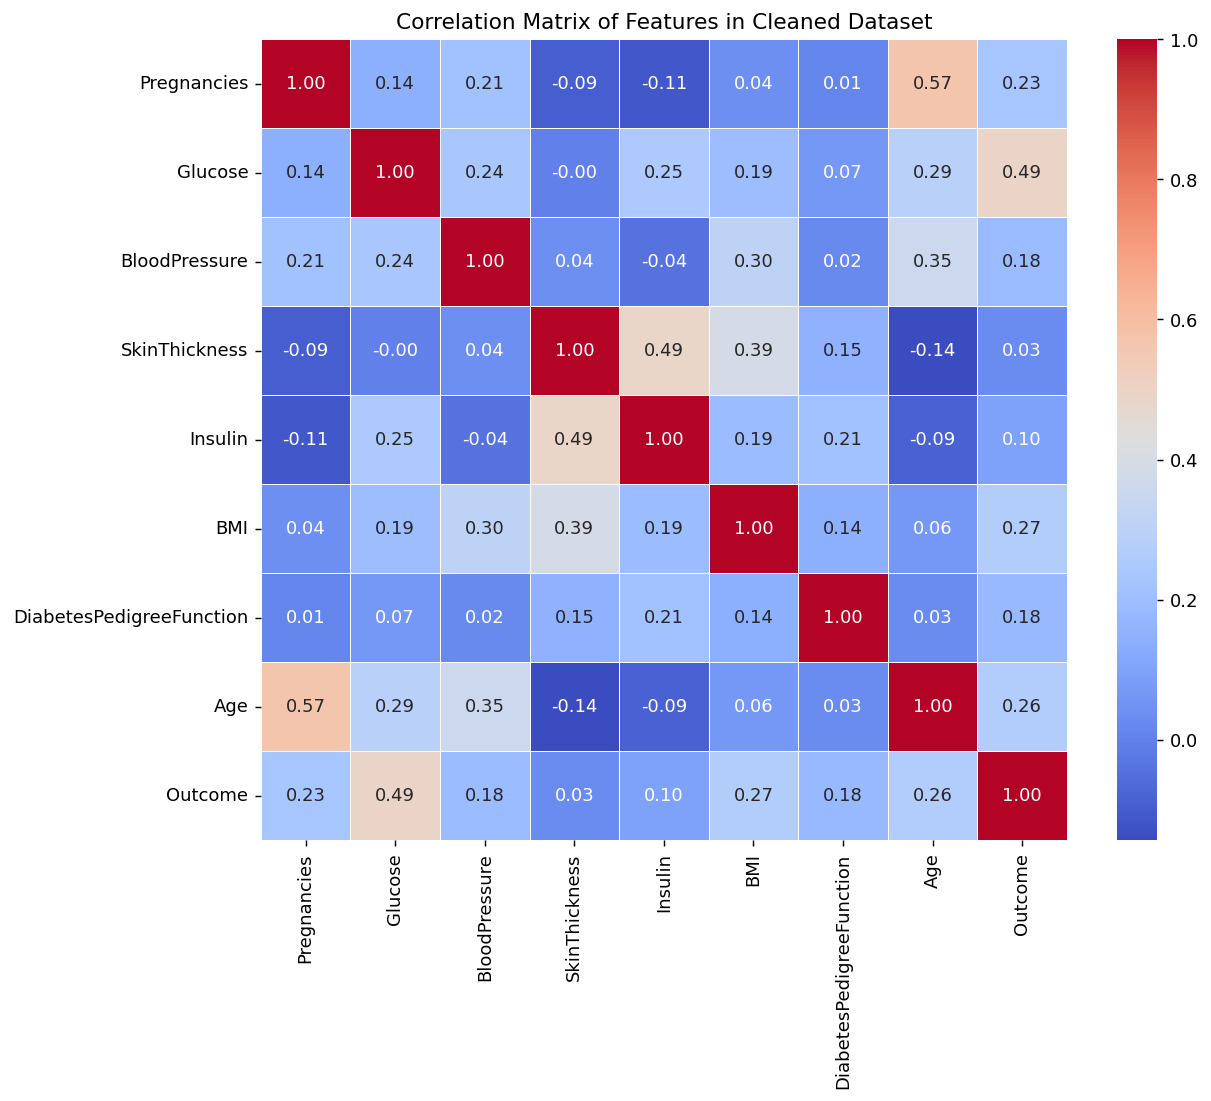

In [8]:
corr = df_cleaned.corr()

plt.figure(figsize=(10, 8), dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features in Cleaned Dataset')
plt.show()

In [9]:
print('Correlation of Features with Outcome (Sorted):')
print(corr['Outcome'].sort_values(ascending=False))

Correlation of Features with Outcome (Sorted):
Outcome                     1.000000
Glucose                     0.492740
BMI                         0.269371
Age                         0.263344
Pregnancies                 0.227987
BloodPressure               0.183298
DiabetesPedigreeFunction    0.179072
Insulin                     0.097746
SkinThickness               0.030676
Name: Outcome, dtype: float64


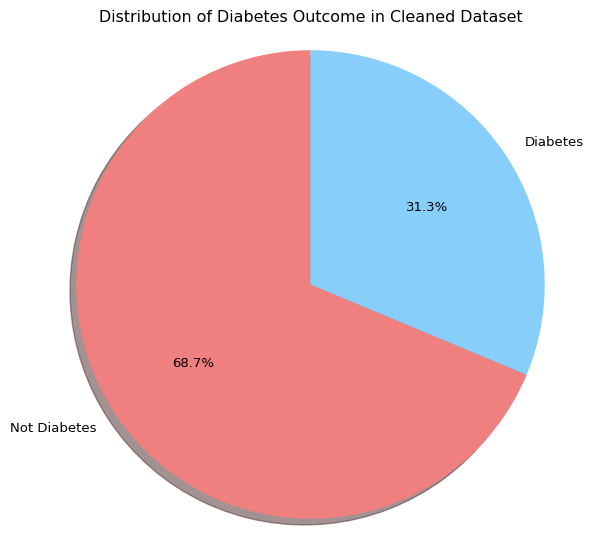

In [12]:
plt.figure(figsize=(7, 7), dpi=95)
plt.pie(df_cleaned['Outcome'].value_counts(), labels=['Not Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=True, startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Diabetes Outcome in Cleaned Dataset')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [13]:
X = df_cleaned.drop(columns=['Outcome'])
y = df_cleaned['Outcome']

print("Features (X) and Target (y) separated successfully.")
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 rows of y:")
display(y.head())

Features (X) and Target (y) separated successfully.

First 5 rows of X:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30



First 5 rows of y:


,Outcome
0,1
1,0
2,1
3,0
5,0


In [14]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print("First 5 rows of X after Normalization (Min-Max Scaling):")
display(pd.DataFrame(X_normalized, columns=X.columns).head())

First 5 rows of X after Normalization (Min-Max Scaling):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.484277,0.493261,0.644444
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.264151,0.245283,0.222222
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.160377,0.533693,0.244444
3,0.076923,0.292208,0.411765,0.383333,0.295597,0.311321,0.079964,0.000000
4,0.384615,0.467532,0.529412,0.000000,0.000000,0.232704,0.110512,0.200000


In [16]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

print("First 5 rows of X after Standardization:")
display(pd.DataFrame(X_standardized, columns=X.columns).head())

First 5 rows of X after Standardization:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093
4,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230
